In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text, ax_text

df = pd.read_csv('Global Ecological Footprint 2023.csv', encoding='latin-1')
df.replace(' ', None, inplace=True)
df = df[[
   'Life Exectancy',
   'Country',
   'Region',
   'Per Capita GDP',
   'Population (millions)',
   'Total Ecological Footprint (Consumption)',
   'Total biocapacity ',
   'Ecological (Deficit) or Reserve',
   'Number of Earths required'
]]
df.columns = [
   'lifexp',
   'country',
   'region',
   'gdpCapita',
   'populationMillions',
   'footprint',
   'biocapacity',
   'ecoReserve',
   'earthsRequired'
]
df['gdpCapita'] = df['gdpCapita'].str.replace('$', '').str.replace(',', '').astype(float)
df['populationMillions'] = df['populationMillions'].str.replace(',', '').astype(float)
df['lifexp'] = df['lifexp'].astype(float)
df['biocapacity'] = df['biocapacity'].astype(float)
df = df[df['biocapacity'] >= 1]

print(df.shape)
print(df.country.unique())
df.to_csv('data_cleaned.csv', index=False)
df.head()

(114, 9)
['Albania' 'Angola' 'Argentina' 'Australia' 'Austria' 'Belarus' 'Belgium'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'Colombia' 'Congo'
 'Congo, Democratic Republic of' 'Costa Rica' "Côte d'Ivoire" 'Croatia'
 'Cuba' 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Fiji' 'Finland'
 'France' 'French Guiana' 'French Polynesia' 'Gabon' 'Georgia' 'Germany'
 'Greece' 'Grenada' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Honduras' 'Hungary'
 'Indonesia' 'Ireland' 'Kazakhstan' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Latvia' 'Liberia' 'Lithuania'
 'Luxembourg' 'Madagascar' 'Malaysia' 'Mali' 'Mauritania' 'Mexico'
 'Mongolia' 'Montenegro' 'Mozambique' 'Myanmar' 'Namibia' 'Netherlands'
 'New Zealand' 'Nicaragua' 'Niger' 'Norway' 'Oman' 'Panama'
 'Papua New Guinea' 'Paraguay' 'Peru' 'Poland' 'Portugal' 

,lifexp,country,region,gdpCapita,populationMillions,footprint,biocapacity,ecoReserve,earthsRequired
1,76.0,Albania,Other Europe,14889.0,2.9,2.1,1.176752,-0.894486,1.371485
3,62.0,Angola,Africa,6304.0,35.0,0.9,1.588191,0.730346,0.568029
5,75.0,Argentina,South America,22117.0,46.0,3.2,5.231663,2.011045,2.132556
7,83.0,Australia,Asia-Pacific,53053.0,26.1,5.8,11.021401,5.244362,3.825307
8,81.0,Austria,EU-27,55460.0,9.1,5.6,2.893775,-2.732866,3.725721


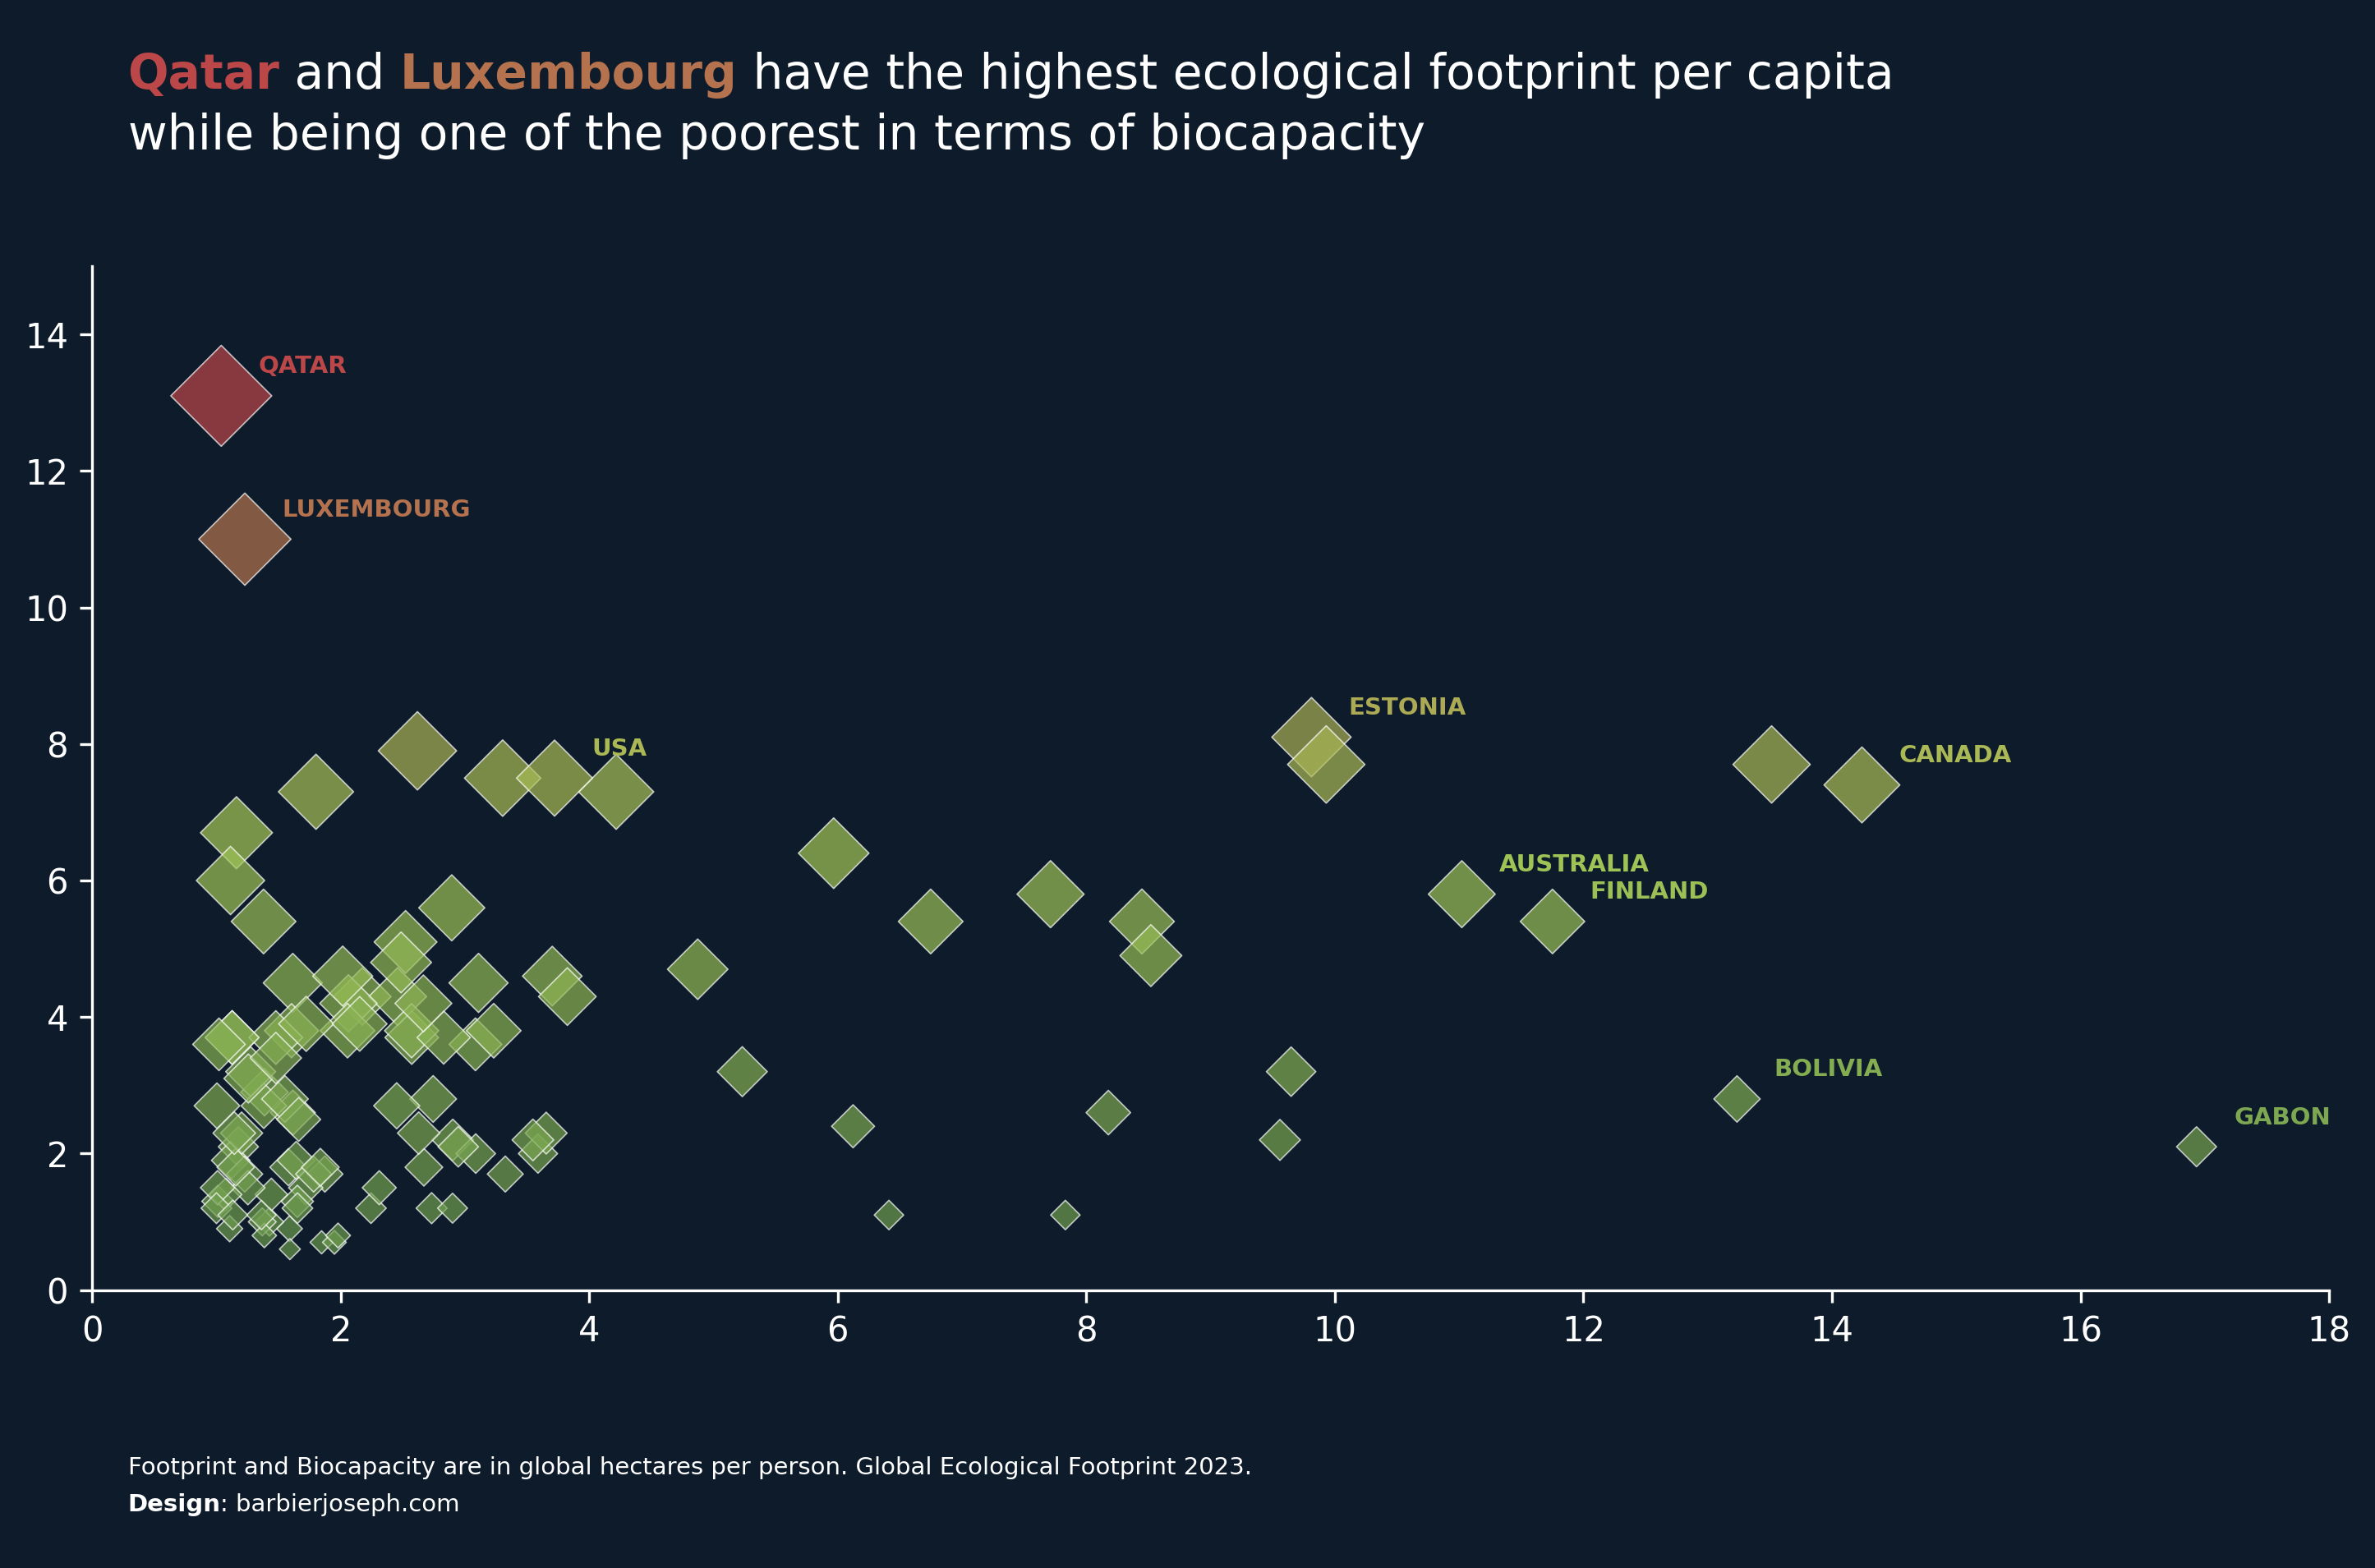

In [154]:
data = df.copy()
data = data[data['biocapacity']< 60]

def create_gradient_colormap(colors):
   cmap = LinearSegmentedColormap.from_list("custom_gradient", colors, N=256)
   return cmap

# parameters
colors = ['#6a994e', '#a7c957', '#bc4749']
cmap = create_gradient_colormap(colors)
background_color = '#0d1b2a'
text_color = 'white'
countries_to_annote = [
   'Australia', 'Bolivia', 'Canada',
   'Finland', 'Gabon',
   'Estonia', 'Luxembourg', 'Qatar',
   'United States of America'
]
x_col = 'biocapacity'
y_col = 'footprint'
c = 'earthsRequired'
s = 'earthsRequired'

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(text_color)
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)
ax.set_xlim(0, 18)
ax.set_ylim(0, 15)

scatter = ax.scatter(
   data[x_col],
   data[y_col],
   c=data[c],
   s=data[s]*50,
   cmap=cmap,
   edgecolor='white',
   alpha=0.7,
   marker='D',
   linewidth=0.4
)
#ax.set_xlabel(x_col, color=text_color)
#ax.set_ylabel(y_col, color=text_color)

for country in countries_to_annote:
   x = data.loc[data['country'] == country, x_col].values[0]
   y = data.loc[data['country'] == country, y_col].values[0]
   color = cmap(data.loc[data['country'] == country, c].values[0]/data[c].max())
   if country == 'United States of America':
      country = 'USA'
   ax_text(
      x+0.3,
      y+0.6,
      country.upper(),
      fontsize=7,
      fontweight='bold',
      color=color,
      ha='left',
      va='top',
      ax=ax
   )

# title
qatar_color = cmap(data.loc[data['country'] == 'Qatar', c].values[0]/data[c].max())
luxembourg_color = cmap(data.loc[data['country'] == 'Luxembourg', c].values[0]/data[c].max())
text = """
<Qatar> and <Luxembourg> have the highest ecological footprint per capita
while being one of the poorest in terms of biocapacity
"""
fig_text(
   0.08,
   1,
   text,
   fontsize=14,
   color=text_color,
   ha='left',
   va='top',
   highlight_textprops=[
      {'fontweight':'bold', 'color':qatar_color},
      {'fontweight':'bold', 'color':luxembourg_color}
   ],
   ax=ax
)

# credit and about
text = """
Footprint and Biocapacity are in global hectares per person. Global Ecological Footprint 2023.
<Design>: barbierjoseph.com
"""
fig_text(
   0.08,
   0.05,
   text,
   fontsize=7,
   color=text_color,
   ha='left',
   va='top',
   highlight_textprops=[
      #{'fontweight':'bold'},
      #{'fontweight':'bold'},
      {'fontweight':'bold'}
   ],
   ax=ax
)

plt.tight_layout()
plt.savefig('scatterplot.png', bbox_inches='tight', dpi=300)
plt.show()

In [117]:
data[(data[y_col] > 8)][['country', x_col, y_col]].country.values
#data[(data[y_col] >6)][['country', x_col, y_col]]
#data[(data[x_col] > 60) & (data[x_col] < 20000)][['country', x_col, y_col]]

array(['Estonia', 'Luxembourg', 'Qatar'], dtype=object)